In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(":"))
    return h * 3600 + m * 60 + s

In [3]:
def seconds_to_time(sec):
    h = sec // 3600
    m = (sec % 3600) // 60
    s = sec % 60
    return f"{h:02}:{m:02}:{s:02}"

In [4]:
# Read Excel file
file_path = "support_uke_24.xlsx"
df = pd.read_excel(file_path)

In [5]:
# Extract data into lists
days = df["Ukedag"].tolist()
times = df["Klokkeslett"].tolist()
durations = df["Varighet"].tolist()
scores = df["Tilfredshet"].tolist()

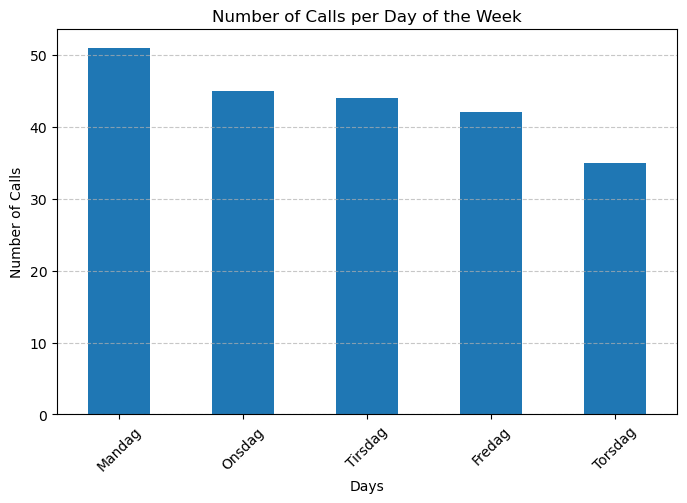

In [6]:
# Count calls per day
plt.figure(figsize=(8, 5))
pd.Series(days).value_counts().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of Calls")
plt.title("Number of Calls per Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
# Find shortest and longest call durations
durations_sec = [time_to_seconds(t) for t in durations]
shortest_call = seconds_to_time(min(durations_sec))
longest_call = seconds_to_time(max(durations_sec))
print(f"Shortest call duration: {shortest_call}")
print(f"Longest call duration: {longest_call}")

Shortest call duration: 00:00:59
Longest call duration: 00:11:28


In [8]:
# Calculate average call duration
average_time = seconds_to_time(int(sum(durations_sec) / len(durations_sec)))
print(f"Average call duration: {average_time}")

Average call duration: 00:06:40


In [9]:
# Count calls per time range
time_ranges = {"08-10": 0, "10-12": 0, "12-14": 0, "14-16": 0}
for time in times:
    hour = int(time.split(":")[0])
    if 8 <= hour < 10:
        time_ranges["08-10"] += 1
    elif 10 <= hour < 12:
        time_ranges["10-12"] += 1
    elif 12 <= hour < 14:
        time_ranges["12-14"] += 1
    elif 14 <= hour < 16:
        time_ranges["14-16"] += 1

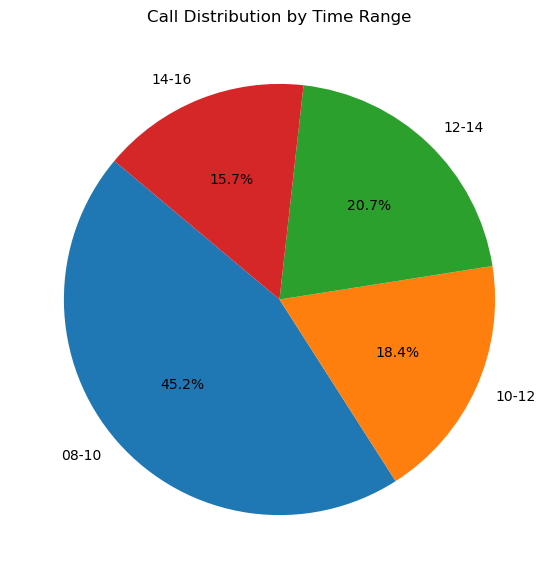

In [10]:
# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(time_ranges.values(), labels=time_ranges.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Call Distribution by Time Range")
plt.show()

In [11]:
# Calculate NPS
valid_scores = [s for s in scores if not pd.isna(s)]
total_customers = len(valid_scores)
negative_count = sum(1 for s in valid_scores if 1 <= s <= 6)
positive_count = sum(1 for s in valid_scores if 9 <= s <= 10)
negative_percentage = (negative_count / total_customers) * 100
positive_percentage = (positive_count / total_customers) * 100
NPS_score = round(positive_percentage - negative_percentage, 2)
print(f"Support Department NPS Score: {NPS_score}")


Support Department NPS Score: 41.86
